In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels

In [4]:
import pandas as pd
from tabulate import tabulate

# Read the first CSV file and drop specified columns
df = pd.read_csv(r"Excels\Excel-1 - District-Level_GWQ_AllYears.csv")
drop_columns = 'arsenic,carbonate,chloride,fluorine,iron,hydrogencarbonate,potassium,magnesium,nitrate,sodium,percentageofsodium,phosphateion,residualsodiumcarbonate,sodiumabsorptionratio,sulfate,silicondioxide,alkalinitytotal,potentialofhydrogen,electricalconductivity,hardnesstotal,totaldissolvedsolids'.split(',')
df = df.drop(columns=drop_columns)
df['SDP'] = None

# Display the modified DataFrame
table = tabulate(df, headers='keys', tablefmt='pretty')

# Read the second CSV file
df2 = pd.read_csv(r"Excels\standardised1999-2022.csv")

# Extract exact year from the 'YEAR' column
# df2['exact_year'] = df2['YEAR'].str.split('-').str[0]
# df2.insert(1, 'exact_year', df2.pop('exact_year'))

# Rename states for consistency
df2 = df2.rename(columns={
    'JAMMU & KASHMIR': 'JAMMU AND KASHMIR',
    'ORISSA': 'ODISHA',
    'TAMIL NADU': 'TAMILNADU',
    'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS',
    'PUDUCHERRY': 'PONDICHERRY'
})

# Create a tabular representation of the DataFrame
table = tabulate(df2, headers='keys', tablefmt='pretty')

# Extract values for SIKKIM in exact years
exact_years = df2['SIKKIM']

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    year = row['year']
    state = row['state'].upper()
    # print(year,state)

    # Handle state name inconsistencies
    if state == 'TAMIL NADU':
        state = 'TAMILNADU'
    if state == 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU':
        continue

    # Extract SDP value for the specific year and state
    value = df2.loc[(df2['exact_year'] == year) & (df2[state].notnull()), state].values

    # print(value)


    # Skip if no value found for the specific year and state
    if len(value) == 0:
        continue

    # Assign SDP value to the corresponding row in the DataFrame
    df.at[index, 'SDP'] = float(value[0])


In [5]:
df2.loc[(df2['exact_year'] == str()) & (df2[state].notnull()), state].values


array([], dtype=int64)

In [6]:
table = tabulate(df2, headers='keys',     tablefmt='pretty')
print(table)

+----+------------+----------------+-------------------+----------+----------+---------+----------+----------+------------------+-------------------+-----------+-----------+----------+----------------+--------------+-------------+---------+-----------+---------+----------+----------+----------+-----------+--------+-----------+---------+---------------+-------------+-------------+-----------------------------+------------+----------+-------------+-----------+
|    | exact_year | ANDHRA PRADESH | ARUNACHAL PRADESH |  ASSAM   |  BIHAR   |   GOA   | GUJARAT  | HARYANA  | HIMACHAL PRADESH | JAMMU AND KASHMIR | JHARKHAND | KARNATAKA |  KERALA  | MADHYA PRADESH | CHHATTISGARH | MAHARASHTRA | MANIPUR | MEGHALAYA | MIZORAM | NAGALAND |  ODISHA  |  PUNJAB  | RAJASTHAN | SIKKIM | TAMILNADU | TRIPURA | UTTAR PRADESH | UTTARAKHAND | WEST BENGAL | ANDAMAN AND NICOBAR ISLANDS | CHANDIGARH |  DELHI   | PONDICHERRY | TELANGANA |
+----+------------+----------------+-------------------+----------+-------

In [7]:
from tabulate import tabulate
table = tabulate(df, headers='keys', tablefmt='pretty')
print("Modified DataFrame from Excel-1:")
print(table)

Modified DataFrame from Excel-1:
+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+-----------+-----------+
|       | country |                    state                     |          district           | year |              dyid               |  calcium  |    SDP    |
+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+-----------+-----------+
|   0   |  India  |                 West Bengal                  |     24 Paraganas North      | 2000 |     24 Paraganas North2000      | 50.588234 | 151670.0  |
|   1   |  India  |                 West Bengal                  |     24 Paraganas North      | 2001 |     24 Paraganas North2001      |    nan    | 162624.0  |
|   2   |  India  |                 West Bengal                  |     24 Paraganas North      | 2002 |     24 Paraganas North2002      | 85.666664 | 168324.

In [8]:
df.to_csv('out.csv')

In [9]:
import statsmodels.api as sm
import pandas as pd

# reading data from the csv
data = pd.read_csv(r"out.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
x = data['SDP']
y = data['calcium']

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           2.32e-37
Time:                        19:00:28   Log-Likelihood:                -37171.
No. Observations:                7309   AIC:                         7.435e+04
Df Residuals:                    7307   BIC:                         7.436e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3674      0.693     79.845      0.0

In [10]:
intercept = result.params[0]

# Get the SDP coefficient
sdp_coefficient = result.params['SDP']

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"SDP coefficient: {sdp_coefficient}")

Intercept: 55.367403782132804
SDP coefficient: 3.159791713381557e-05


C:\Users\baljyot\AppData\Local\Temp\ipykernel_6256\3289663342.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]


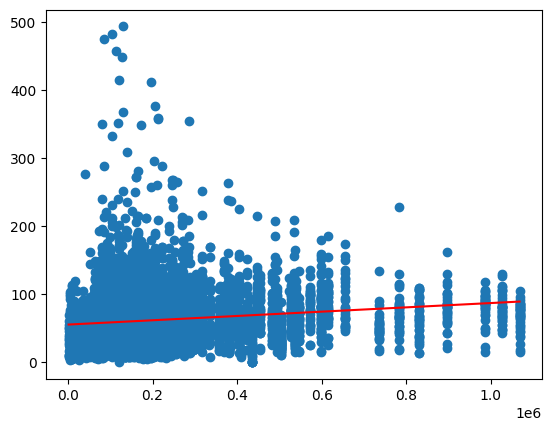

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading data from the csv
data = pd.read_csv(r"out.csv")

# Clean data and convert to numeric
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# plotting the original values
x = data['SDP']
y = data['calcium']
plt.scatter(x, y)

# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = x.max()
min_x = x.min()

# range of values for plotting
# the regression line
x_values = np.arange(min_x, max_x, 1)

# the substituted equation
y_values = sdp_coefficient* x_values + intercept

# plotting the regression line
plt.plot(x_values, y_values, 'r')
plt.show()


In order to interpret the above regression plot and the OLS Regression table, we notice that coefficient of SDP is 4.71x10(^-5), in essence, if we change the value of independent variable i.e SDP by 1 unit then that would result in a change of 4.71x10(^-5) units on the dependent variable i.e ground-water quality indicator, in this case, calcium. Also, the error coefficient is 53.8226 units and goodness of fit(R-squared) = 0.028 for the above regression as evident by the regression table as well.

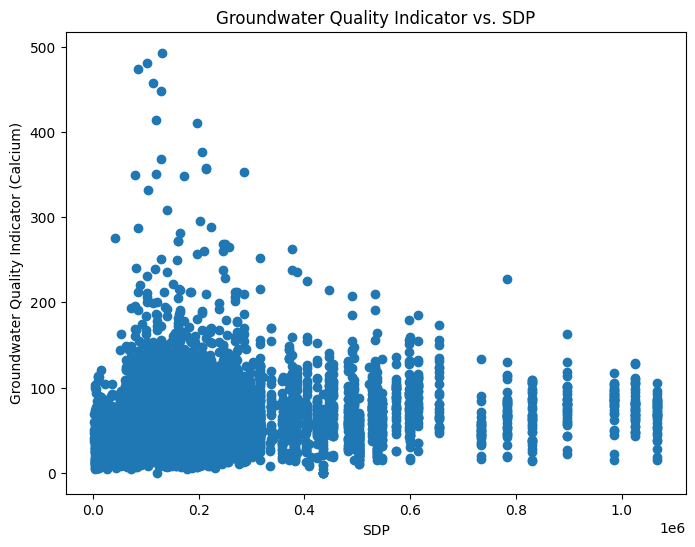

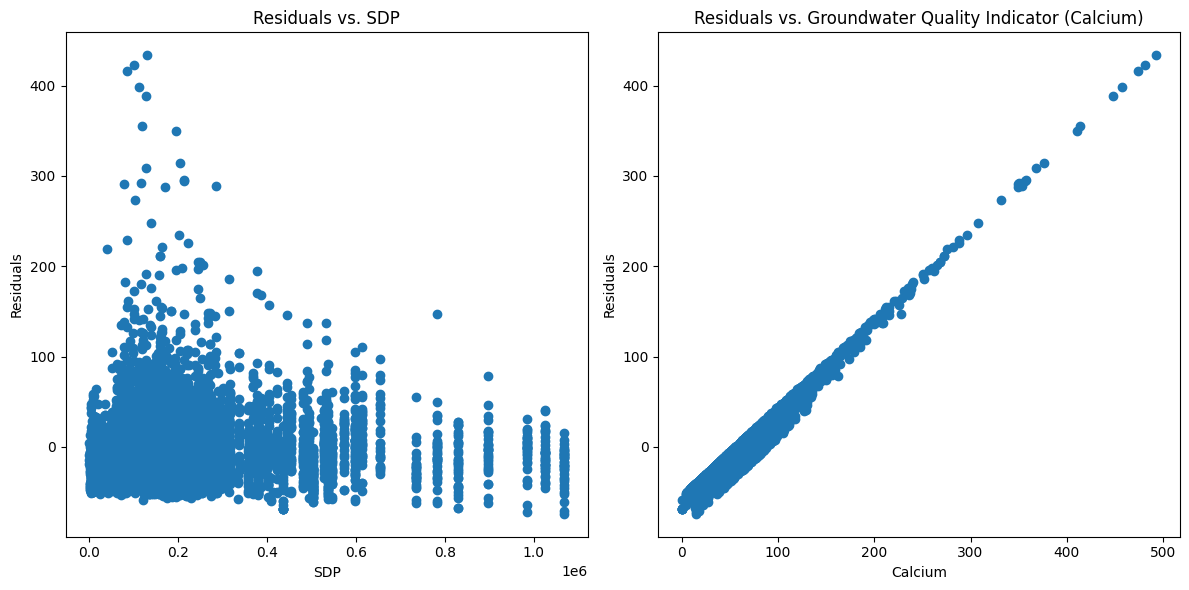

'\nResiduals vs. SDP:\nThis plot shows the relationship between the model residuals and the independent variable SDP.\nIf the model assumptions are met, we would expect the residuals to be randomly scattered around zero, without any discernible pattern or trend as SDP changes.\nAny systematic pattern or trend in the residuals could indicate that the model is not capturing all the information in the data, or there might be issues like heteroscedasticity or \nmisspecification of the model.\nGroundwater Quality Indicator (Calcium) vs. SDP:\nThis plot shows the relationship between the groundwater quality indicator (calcium) and SDP.\nWe might expect some relationship between these variables if SDP is related to the groundwater quality indicator. For example, higher SDP values could be associated with higher or \nlower calcium levels.\nThe plot should give an indication of how the groundwater quality indicator varies across different levels of SDP.\nOverall, the plots help us assess the re

In [13]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# reading data from the csv
data = pd.read_csv(r"out.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
x = data['SDP']
y = data['calcium']

# adding the constant term
x = sm.add_constant(x)

# performing the regression and fitting the model
result = sm.OLS(y, x).fit()

# Calculate model residuals
residuals = result.resid

# Plot Groundwater Quality Indicator (calcium) against SDP
plt.figure(figsize=(8, 6))
plt.scatter(data['SDP'], data['calcium'])
plt.xlabel('SDP')
plt.ylabel('Groundwater Quality Indicator (Calcium)')
plt.title('Groundwater Quality Indicator vs. SDP')
plt.show()


# Plot 1: Residuals vs. SDP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['SDP'], residuals)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. SDP')

# Plot 2: Residuals vs. Groundwater Quality Indicator (Calcium)
plt.subplot(1, 2, 2)
plt.scatter(data['calcium'], residuals)
plt.xlabel('Calcium')
plt.ylabel('Residuals')
plt.title('Residuals vs. Groundwater Quality Indicator (Calcium)')

plt.tight_layout()
plt.show()


'''
Residuals vs. SDP:
This plot shows the relationship between the model residuals and the independent variable SDP.
If the model assumptions are met, we would expect the residuals to be randomly scattered around zero, without any discernible pattern or trend as SDP changes.
Any systematic pattern or trend in the residuals could indicate that the model is not capturing all the information in the data, or there might be issues like heteroscedasticity or 
misspecification of the model.
Groundwater Quality Indicator (Calcium) vs. SDP:
This plot shows the relationship between the groundwater quality indicator (calcium) and SDP.
We might expect some relationship between these variables if SDP is related to the groundwater quality indicator. For example, higher SDP values could be associated with higher or 
lower calcium levels.
The plot should give an indication of how the groundwater quality indicator varies across different levels of SDP.
Overall, the plots help us assess the relationship between the variables and the adequacy of the regression model. If the assumptions hold, the residuals vs. SDP plot should show a 
random scatter around zero, while the Groundwater Quality Indicator vs. SDP plot might show some trend or pattern indicating the relationship between these variables. If the plots do 
not match our expectations, further investigation may be needed to understand potential issues with the model or data.
'''

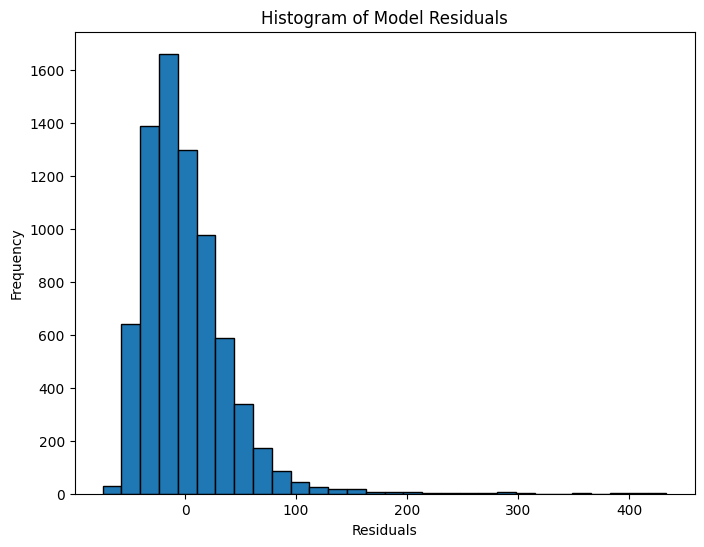

Sum of Residuals: -2.15550244320184e-10


In [14]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading data from the csv
data = pd.read_csv(r"out.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data['calcium'] = pd.to_numeric(data['calcium'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', 'calcium'], inplace=True)

# defining the variables
x = data['SDP']
y = data['calcium']

# adding the constant term
x = sm.add_constant(x)

# performing the regression and fitting the model
result = sm.OLS(y, x).fit()

# Calculate model residuals
residuals = result.resid

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Model Residuals')
plt.show()

# Verify that the sum of residuals is approximately zero
sum_residuals = np.sum(residuals)
print("Sum of Residuals:", sum_residuals)